In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from karateclub.graph_embedding import Graph2Vec

# Example of graph2vec embedding an easy dataset

In [3]:
N = 1000
graphs_sparse = [nx.newman_watts_strogatz_graph(50, 5, 0.25) for _ in range(N)]
graphs_dense = [nx.newman_watts_strogatz_graph(50, 5, 0.9) for _ in range(N)]
dataset = graphs_sparse + graphs_dense

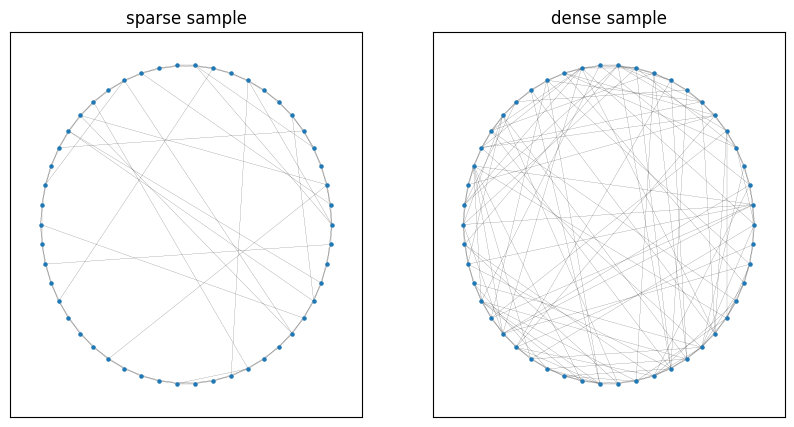

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
g1, g2 = graphs_sparse[np.random.randint(0, N)], graphs_dense[np.random.randint(0, N)]
nx.draw_networkx(g1, pos=nx.circular_layout(g1), node_size=5, width=0.1, with_labels=False, ax=axes[0])
nx.draw_networkx(g2, pos=nx.circular_layout(g2), node_size=5, width=0.1, with_labels=False, ax=axes[1])
axes[0].set_title('sparse sample')
axes[1].set_title('dense sample')
plt.show()

In [5]:
model = Graph2Vec(dimensions=2)
model.fit(dataset)
embeddings = model.get_embedding()

Embedded dataset shape: (2000, 2)


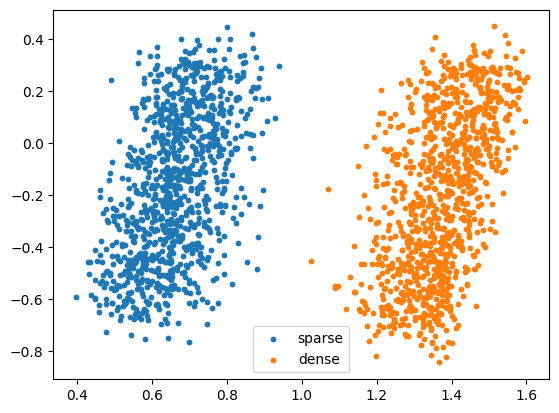

In [6]:
print(f"Embedded dataset shape: {embeddings.shape}")
plt.scatter(embeddings[:N, 0], embeddings[:N, 1], s=10, color='tab:blue', label='sparse')
plt.scatter(embeddings[N:, 0], embeddings[N:, 1], s=10, color='tab:orange', label='dense')
plt.legend()
plt.show()

In [7]:
test_dataset = [nx.newman_watts_strogatz_graph(50, 5, 0.5) for _ in range(int(N))]
test_embeddings = model.infer(test_dataset)

Embedded test dataset shape: (2000, 2)


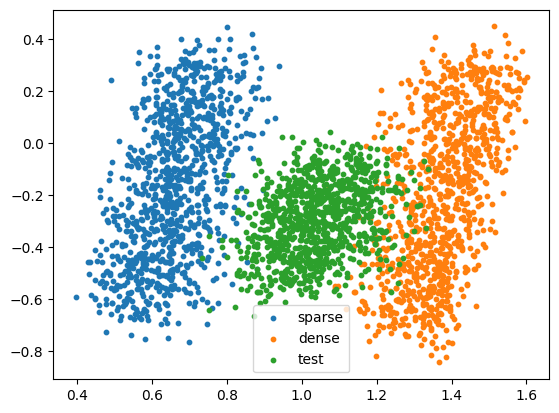

In [8]:
print(f"Embedded test dataset shape: {embeddings.shape}")
plt.scatter(embeddings[:N, 0], embeddings[:N, 1], s=10, color='tab:blue', label='sparse')
plt.scatter(embeddings[N:, 0], embeddings[N:, 1], s=10, color='tab:orange', label='dense')
plt.scatter(test_embeddings[:, 0], test_embeddings[:, 1], s=10, color='tab:green', label='test')
plt.legend()
plt.show()

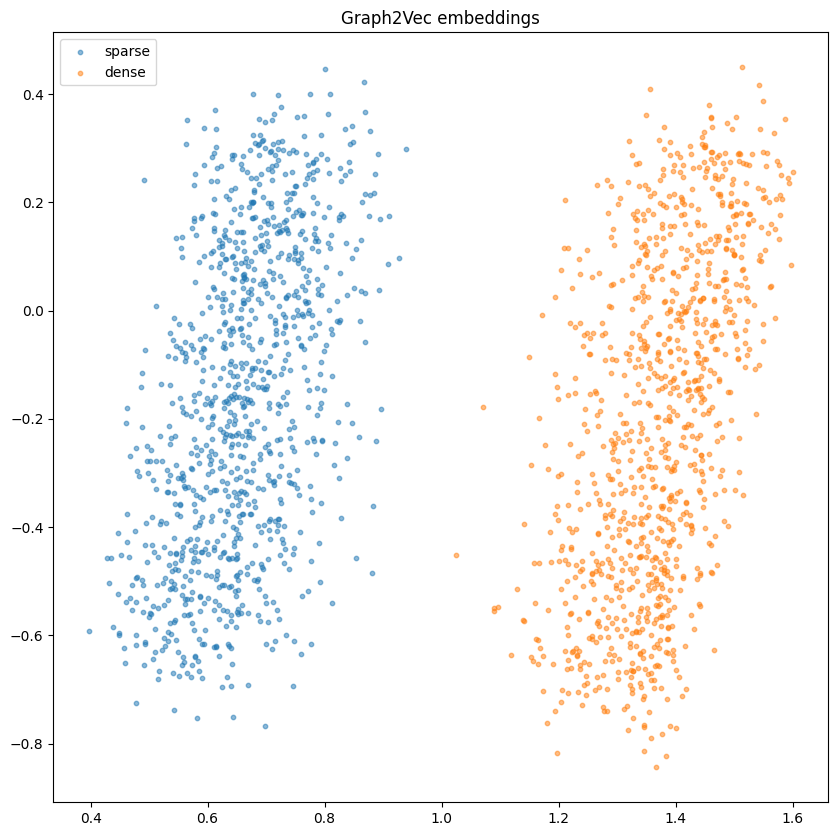

In [12]:
labels = np.array([0] * N + [1] * N)

# plot the embeddings and label them
fig, ax = plt.subplots(figsize=(10, 10))

# Scatter datapoints with appropriate colors and labels
# ax.scatter(embeddings[:, 0], embeddings[:, 1], c=labels, cmap='tab10', s=10, alpha=0.5)
ax.scatter(embeddings[labels == 0, 0], embeddings[labels == 0, 1], c='tab:blue', s=10, alpha=0.5, label='sparse')
ax.scatter(embeddings[labels == 1, 0], embeddings[labels == 1, 1], c='tab:orange', s=10, alpha=0.5, label='dense')
ax.set_title('Graph2Vec embeddings')
plt.legend()
plt.show()